In [282]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [429]:
import os
os.path
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

2. Data Preparation

In [430]:
categories = ['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

In [431]:
my_file=open("amazon_cells_labelled.txt",'r')
content=my_file.read()

In [432]:
print(type(content))
print(len(content))

<class 'str'>
58226


In [433]:
s=np.array(content)
print(s)

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So G

### 3.1 Converting Dictionary into Pandas dataframe


In [434]:
import re
file=open("imdb_labelled.txt","r")
lines=file.readlines()
A=[]
for i in range(1000):
    s=lines[i]
    x=re.split('\t|\n',s)
    A.append(x)

a,b,c= map(list,zip(*A))
imdb_labelled=pd.DataFrame(list(zip(a,b)),columns=['sentences','score'])
print(imdb_labelled.head(5))
print(imdb_labelled.shape)

                                           sentences score
0  A very, very, very slow-moving, aimless movie ...     0
1  Not sure who was more lost - the flat characte...     0
2  Attempting artiness with black & white and cle...     0
3       Very little music or anything to speak of.       0
4  The best scene in the movie was when Gerardo i...     1
(1000, 2)


In [435]:
#input data, change label's name
amazon_cells_labelled=pd.read_table("amazon_cells_labelled.txt",header = None)
#imdb_labelled=pd.read_table("imdb_labelled.txt",header = None)
yelp_labelled=pd.read_table("yelp_labelled.txt",header = None)
amazon_cells_labelled.columns=['sentences','score']
imdb_labelled.columns=['sentences','score']
yelp_labelled.columns=['sentences','score']

In [436]:
len(amazon_cells_labelled)

1000

In [437]:
amazon_cells_labelled

,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [438]:
amazon_cells_labelled[:10]

,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [439]:
## add category to the dataframe
amazon_cells_labelled["category"]='1'
amazon_cells_labelled['category_name']='amazon_cells_labelled'
imdb_labelled["category"]='2'
imdb_labelled['category_name']='imdb_labelled'
yelp_labelled["category"]='3'
yelp_labelled['category_name']='yelp_labelled'

In [440]:
#combine three data sets
combine=pd.concat([amazon_cells_labelled,imdb_labelled , yelp_labelled])
three_combine=pd.DataFrame(combine,columns=['sentences','score',"category",'category_name'])
three_combine.reset_index(drop=True,inplace=True)
print(combine)

                                             sentences score category  \
0    So there is no way for me to plug it in here i...     0        1   
1                          Good case, Excellent value.     1        1   
2                               Great for the jawbone.     1        1   
3    Tied to charger for conversations lasting more...     0        1   
4                                    The mic is great.     1        1   
5    I have to jiggle the plug to get it to line up...     0        1   
6    If you have several dozen or several hundred c...     0        1   
7          If you are Razr owner...you must have this!     1        1   
8                  Needless to say, I wasted my money.     0        1   
9                     What a waste of money and time!.     0        1   
10                     And the sound quality is great.     1        1   
11   He was very impressed when going from the orig...     1        1   
12   If the two were seperated by a mere 5+ ft I st

In [441]:
three_combine.shape

(3000, 4)

In [442]:
three_combine[0:10]

,sentences,score,category,category_name
0,So there is no way for me to plug it in here i...,0,1,amazon_cells_labelled
1,"Good case, Excellent value.",1,1,amazon_cells_labelled
2,Great for the jawbone.,1,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,1,amazon_cells_labelled
4,The mic is great.,1,1,amazon_cells_labelled
5,I have to jiggle the plug to get it to line up...,0,1,amazon_cells_labelled
6,If you have several dozen or several hundred c...,0,1,amazon_cells_labelled
7,If you are Razr owner...you must have this!,1,1,amazon_cells_labelled
8,"Needless to say, I wasted my money.",0,1,amazon_cells_labelled
9,What a waste of money and time!.,0,1,amazon_cells_labelled


### 3.2 Familiarizing yourself with the Data 

In [443]:
three_combine[0:11][['sentences','score']]

,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [444]:
three_combine[-11:-1]

,sentences,score,category,category_name
2989,I would avoid this place if you are staying in...,0,3,yelp_labelled
2990,The refried beans that came with my meal were ...,0,3,yelp_labelled
2991,Spend your money and time some place else.,0,3,yelp_labelled
2992,A lady at the table next to us found a live gr...,0,3,yelp_labelled
2993,the presentation of the food was awful.,0,3,yelp_labelled
2994,I can't tell you how disappointed I was.,0,3,yelp_labelled
2995,I think food should have flavor and texture an...,0,3,yelp_labelled
2996,Appetite instantly gone.,0,3,yelp_labelled
2997,Overall I was not impressed and would not go b...,0,3,yelp_labelled
2998,"The whole experience was underwhelming, and I ...",0,3,yelp_labelled


In [445]:
three_combine.iloc[::10, :][0:10]

,sentences,score,category,category_name
0,So there is no way for me to plug it in here i...,0,1,amazon_cells_labelled
10,And the sound quality is great.,1,1,amazon_cells_labelled
20,I went on Motorola's website and followed all ...,0,1,amazon_cells_labelled
30,"This is a simple little phone to use, but the ...",0,1,amazon_cells_labelled
40,"It has a great camera thats 2MP, and the pics ...",1,1,amazon_cells_labelled
50,Not loud enough and doesn't turn on like it sh...,0,1,amazon_cells_labelled
60,Essentially you can forget Microsoft's tech su...,0,1,amazon_cells_labelled
70,Mic Doesn't work.,0,1,amazon_cells_labelled
80,I wear it everyday and it holds up very well.,1,1,amazon_cells_labelled
90,For a product that costs as much as this one d...,0,1,amazon_cells_labelled


In [446]:
#Exercise 0 another query tech
three_combine.tail(5)

,sentences,score,category,category_name
2995,I think food should have flavor and texture an...,0,3,yelp_labelled
2996,Appetite instantly gone.,0,3,yelp_labelled
2997,Overall I was not impressed and would not go b...,0,3,yelp_labelled
2998,"The whole experience was underwhelming, and I ...",0,3,yelp_labelled
2999,"Then, as if I hadn't wasted enough of my life ...",0,3,yelp_labelled


### 4. Data Mining using Pandas

In [447]:
three_combine.isnull()

,sentences,score,category,category_name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [448]:
three_combine.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences        (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

In [449]:
#Exercise1:calculate the missing values for every record instead of every column. 
three_combine.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

In [450]:
dummy_series = pd.Series(["dummy_record", 1,3], index=['sentences','score','category'])

In [451]:
dummy_series

sentences    dummy_record
score                   1
category                3
dtype: object

In [452]:
result_with_series = three_combine.append(dummy_series, ignore_index=True)

In [453]:
# check if the records was commited into result
len(result_with_series)

3001

In [454]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences        (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [455]:
dummy_dict = [{'sentences': 'dummy_record',
               'category': 1
              }]

In [456]:
three_combine = three_combine.append(dummy_dict,ignore_index=True)

In [457]:
len(three_combine)

3001

In [458]:
three_combine.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences        (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 1)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [459]:
three_combine.dropna(inplace=True)

In [460]:
three_combine.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences        (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

### 4.2 Dealing with Duplicate Data

In [461]:
three_combine.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [462]:
sum(three_combine.duplicated())

17

In [463]:
sum(three_combine.duplicated('sentences'))

17

In [464]:
three_combine.drop_duplicates(keep=False, inplace=True)

In [465]:
len(three_combine)

2966

### 5.  Data Preprocessing

In [466]:
#sample
X=three_combine
X_sample = three_combine.sample(n=1000)

In [467]:
len(X_sample)

1000

In [468]:
categories

['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

In [469]:
X_category_counts = ta.get_tokens_and_frequency(list(X.category_name))
X_sample_category_counts = ta.get_tokens_and_frequency(list(X_sample.category_name))

In [470]:
py.offline.init_notebook_mode(connected=True)

In [327]:
py.offline.iplot(ta.plot_word_frequency(X_category_counts, "Category distribution"))

In [328]:
py.offline.iplot(ta.plot_word_frequency(X_sample_category_counts, "Category distribution"))

In [336]:
#Exercise2
import plotly.graph_objs as go

trace1 = go.Bar(
    x=['amazon_cells_labelled', 'yelp_labelled', 'imdb_labelled'],
    y=[994,992,980],
    name='Original'
)
trace2 = go.Bar(
    x=['amazon_cells_labelled', 'yelp_labelled', 'imdb_labelled'],
    y=[348,330,322],
    name='Sample'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='grouped-bar')


In [337]:
X_category_counts

(odict_keys(['imdb_labelled', 'yelp_labelled', 'amazon_cells_labelled', nan]),
 odict_values([994, 992, 980, 1]))

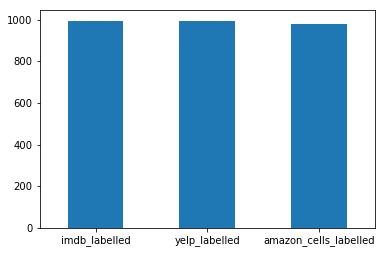

In [338]:
X.category_name.value_counts().plot(kind="bar", rot=0)

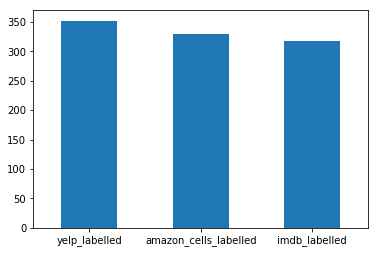

In [339]:
X_sample.category_name.value_counts().plot(kind="bar", rot=0)

### 5.2 Feature Creation

In [340]:
import nltk

"""
Helper functions for data mining lab session 2017 Fall

Notations:
d - document
D - documents
V - vowels
w - word
W - words
l - letter
"""

def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens


In [343]:
# takes a like a minute or two to process
import nltk
X['unigrams'] = X['sentences'].apply(lambda x: dmh.tokenize_text(x))

In [344]:
X[0:4]

,sentences,score,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,1,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,1,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin..."


In [345]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection

In [346]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentences)

In [350]:
print(X)

                                              sentences score category  \
0     So there is no way for me to plug it in here i...     0        1   
1                           Good case, Excellent value.     1        1   
2                                Great for the jawbone.     1        1   
3     Tied to charger for conversations lasting more...     0        1   
4                                     The mic is great.     1        1   
5     I have to jiggle the plug to get it to line up...     0        1   
6     If you have several dozen or several hundred c...     0        1   
7           If you are Razr owner...you must have this!     1        1   
8                   Needless to say, I wasted my money.     0        1   
9                      What a waste of money and time!.     0        1   
10                      And the sound quality is great.     1        1   
11    He was very impressed when going from the orig...     1        1   
12    If the two were seperated by a m

In [351]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[4:10].sentences)))

['the',
 'mic',
 'is',
 'great',
 'have',
 'to',
 'jiggle',
 'the',
 'plug',
 'to',
 'get',
 'it',
 'to',
 'line',
 'up',
 'right',
 'to',
 'get',
 'decent',
 'volume',
 'if',
 'you',
 'have',
 'several',
 'dozen',
 'or',
 'several',
 'hundred',
 'contacts',
 'then',
 'imagine',
 'the',
 'fun',
 'of',
 'sending',
 'each',
 'of',
 'them',
 'one',
 'by',
 'one',
 'if',
 'you',
 'are',
 'razr',
 'owner',
 'you',
 'must',
 'have',
 'this',
 'needless',
 'to',
 'say',
 'wasted',
 'my',
 'money',
 'what',
 'waste',
 'of',
 'money',
 'and',
 'time']

In [352]:
X_counts.shape

(2967, 5154)

In [353]:
# We can obtain the feature names of the vectorizer, i.e., the terms
count_vect.get_feature_names()[0:50]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020']

In [354]:
X[0:5]

,sentences,score,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,1,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,1,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,1,amazon_cells_labelled,"[The, mic, is, great, .]"


In [355]:
type(X)

pandas.core.frame.DataFrame

In [356]:
X_counts[0:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [357]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [358]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [359]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:200]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:200]]
plot_z = X_counts[0:200, 0:200].toarray()

# to plot
py.offline.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))


In [360]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]

In [361]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020',
 'term_510',
 'term_5320',
 'term_54',
 'term_5lb',
 'term_680',
 'term_70',
 'term_70000',
 'term_700w',
 'term_70s',
 'term_80',
 'term_80s',
 'term_8125',
 'term_85',
 'term_8525',
 'term_8530',
 'term_8pm',
 'term_90',
 'term_95',
 'term_99',
 'term_aailiyah',
 'term_abandoned',
 'term_abhor',
 'term_ability',
 'term_able',
 'term_abound',
 '

In [362]:
plot_y = ["doc_"+ str(i) for i in list(X.index)]

In [363]:
plot_z = X_counts.toarray()

In [364]:
# Exercise3--plot this one sometimes may cause sys crash
py.offline.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### 5.4 Dimensionality Reduction

In [365]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())
X_reduced.shape

(2967, 3)

In [366]:
categories

['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

In [367]:
trace1 = ta.get_trace(X_reduced, X["category_name"], "amazon_cells_labelled", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced, X["category_name"], "imdb_labelled", "rgb(52,133,252)")
trace3 = ta.get_trace(X_reduced, X["category_name"], "yelp_labelled", "rgb(229,65,136)")

In [368]:
data = [trace1, trace2, trace3]

In [369]:
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='simple-3d-scatter')

5.5 Atrribute Transformation / Aggregation

In [370]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [371]:
term_frequencies[0]
term_frequencies_1 = [math.pow(i,1) for i in term_frequencies]

In [372]:
py.offline.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_1], "Term Frequency Distribution"))

In [386]:
#Exercise4
pairs=[(term_frequencies,count_vect.get_feature_names())]
pairs.sort(reverse=True)
c={"a" : term_frequencies_1,
   "b" : count_vect.get_feature_names()}
df=pd.DataFrame(c)
df1=df.sort_values(["a"],ascending=False)
term_frequencies_2=list(df1["a"])
feature_names=list(df1["b"])
py.offline.iplot(ta.plot_word_frequency([feature_names, term_frequencies_2], "Term Frequency Distribution"))

In [387]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [388]:
py.offline.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log], "Term Frequency Distribution"))

In [389]:
#
term_frequencies_log_2 = [math.log(i) for i in term_frequencies_2]
py.offline.iplot(ta.plot_word_frequency([feature_names, term_frequencies_log_2], "Term Frequency Distribution"))

### 5.6 Discretization and Binarization

In [396]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [408]:
type(X)

pandas.core.frame.DataFrame

In [472]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [473]:
mlb.classes_

array(['1', '2', '3'],
      dtype='<U1')

In [474]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [475]:
X[0:9]

,sentences,score,category,category_name,bin_category
0,So there is no way for me to plug it in here i...,0,1,amazon_cells_labelled,"[1, 0, 0]"
1,"Good case, Excellent value.",1,1,amazon_cells_labelled,"[1, 0, 0]"
2,Great for the jawbone.,1,1,amazon_cells_labelled,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,1,amazon_cells_labelled,"[1, 0, 0]"
4,The mic is great.,1,1,amazon_cells_labelled,"[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,1,amazon_cells_labelled,"[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,1,amazon_cells_labelled,"[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,1,amazon_cells_labelled,"[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,1,amazon_cells_labelled,"[1, 0, 0]"
